In [1]:
machines = (1,2,3,4)
products = (1,2,3)

# Sequence: {Product: [Machine i, Machine j, ...]}
seq = {1:[1,3,4], 2:[1,2,4], 3:[2,3]}

In [2]:
#Time (product,machine)
time = {(1,1): 30,
        (1,3): 40,
        (1,4): 20,
        (2,1): 25,
        (2,2): 25,
        (2,4): 10,
        (3,2): 10,
        (3,3): 30}

In [3]:
from gurobipy import *

In [4]:
arcs = [(i,j) for i in products for j in seq[i]]
arcs

[(1, 1), (1, 3), (1, 4), (2, 1), (2, 2), (2, 4), (3, 2), (3, 3)]

In [5]:
#Creation of Model 
model = Model("JobShop")

x = model.addVars(arcs,vtype=GRB.INTEGER, name='x')
opt = model.addVars(arcs,vtype=GRB.BINARY, name='opt')
y = model.addVar(vtype=GRB.INTEGER, name='y')

# Work sequences

# Product 1 - Sequence:
model.addConstr(x[1,1]+time[1,1] <= x[1,3])
model.addConstr(x[1,3]+time[1,3] <= x[1,4])

# Product 2 - Sequence:
model.addConstr(x[2,1]+time[2,1] <= x[2,2])
model.addConstr(x[2,2]+time[2,2] <= x[2,4])

# Product 3 - Sequence:
model.addConstr(x[3,2]+time[3,2] <= x[3,3])

# Machine 1
model.addConstr((opt[1,1]==1) >> (x[1,1]+time[1,1] <= x[2,1]))
model.addConstr((opt[2,1]==1) >> (x[2,1]+time[2,1] <= x[1,1]))
model.addConstr(opt[1,1]+opt[2,1]==1)

# Machine 2
model.addConstr((opt[2,2]==1) >> (x[2,2]+time[2,2] <= x[3,2]))
model.addConstr((opt[3,2]==1) >> (x[3,2]+time[3,2] <= x[2,2]))
model.addConstr(opt[2,2]+opt[3,2]==1)

# Machine 3
model.addConstr((opt[1,3]==1) >> (x[1,3]+time[1,3] <= x[3,3]))
model.addConstr((opt[3,3]==1) >> (x[3,3]+time[3,3] <= x[1,3]))
model.addConstr(opt[1,3]+opt[3,3]==1)

# Machine 4
model.addConstr((opt[1,4]==1) >> (x[1,4]+time[1,4] <= x[2,4]))
model.addConstr((opt[2,4]==1) >> (x[2,4]+time[2,4] <= x[1,4]))
model.addConstr(opt[1,4]+opt[2,4]==1)

# Minimize the makespan
model.addConstr(y>= x[1,4]+time[1,4])
model.addConstr(y>= x[2,4]+time[2,4])
model.addConstr(y>= x[3,3]+time[3,3])

model.setObjective(y,GRB.MINIMIZE)

model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12 rows, 17 columns and 24 nonzeros
Model fingerprint: 0xdf53e6f5
Model has 8 general constraints
Variable types: 0 continuous, 17 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
  GenCon rhs range [1e+01, 4e+01]
  GenCon coe range [1e+00, 1e+00]
Presolve added 8 rows and 8 columns
Presolve time: 0.00s
Presolved: 20 rows, 25 columns, 48 nonzeros
Presolved model has 8 SOS constraint(s)
Variable types: 0 continuous, 25 integer (8 binary)
Found heuristic solution: objective 100.0000000

Explored 0 nodes (0 simplex iterations) in 0.02

In [6]:
#Obtain the solution
solution = dict()
for i,j in arcs:
    solution[i,j]=x[i,j].x
solution

{(1, 1): -0.0,
 (1, 3): 30.0,
 (1, 4): 70.0,
 (2, 1): 30.0,
 (2, 2): 55.0,
 (2, 4): 90.0,
 (3, 2): -0.0,
 (3, 3): 70.0}

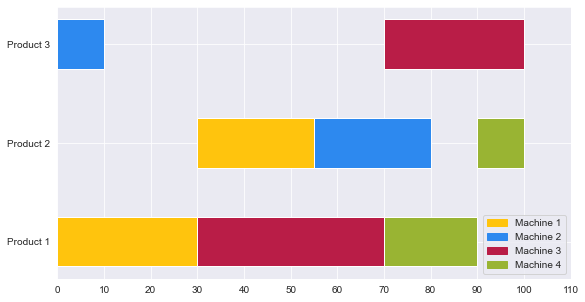

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

schedule_1 = ['M1','M3','M4']
color_1 = ['#ffc40d','#b91d47','#99b433']

schedule_2 = ['M1','M2','M4']
color_2 = ['#ffc40d','#2d89ef','#99b433']

schedule_3 = ['M2','M3']
color_3 = ['#2d89ef','#b91d47']

results_1 = {'Product 1':[30,70,90]}
width_1 = [30,40,20]
starts_1 = [0,30,70]

results_2 = {'Product 2':[55,80,100]}
width_2 = [25,25,10]
starts_2 = [30,55,90]

results_3 = {'Product 3':[10,100]}
width_3 = [10,30]
starts_3 = [0,70]

fig, ax = plt.subplots(figsize=(9.2,5))

sns.set_style("darkgrid")

labels=list(results_1.keys())
colname=schedule_1
ax.barh(labels,width_1,left=starts_1,height=0.5,label=colname,color=color_1)

labels=list(results_2.keys())
colname=schedule_2
ax.barh(labels,width_2,left=starts_2,height=0.5,label=colname,color=color_2)

labels=list(results_3.keys())
colname=schedule_3
ax.barh(labels,width_3,left=starts_3,height=0.5,label=colname,color=color_3)

red_patch = mpatches.Patch(color='#b91d47',label='Machine 3')
blue_patch = mpatches.Patch(color='#2d89ef',label='Machine 2')
yellow_patch = mpatches.Patch(color='#ffc40d',label='Machine 1')
green_patch = mpatches.Patch(color='#99b433',label='Machine 4')

plt.legend(handles=[yellow_patch,blue_patch,red_patch,green_patch])

major_ticks = np.arange(0,120,10)
ax.set_xticks(major_ticks)
plt.grid(which='major',axis='x',alpha=1)

plt.show()